 # Испанские вина 

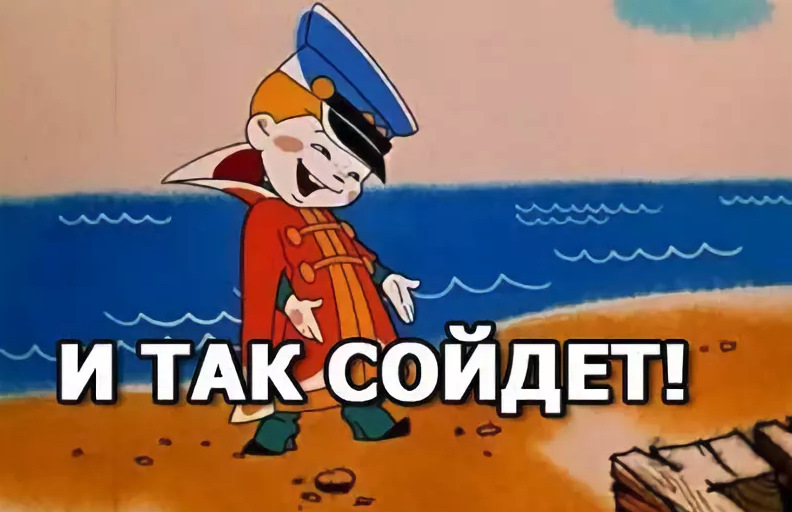

(Проект разрабывается исключительно с целью подсказать Филлипу наиболее качественное испанское вино) 

Данные были взяты из следующего источника: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

Предыстория: Первоначально план нашей команды состоял в том, чтобы спарсить всю необходимую информацию о винах с замечательного сайта WineStyle, однако на нашем пути стояла непосильная для нас преграда - научиться нормально парсить, обходить капчу 18+ и попытаться сделать как-то так, чтобы нас не забанил сайт при парсинге. К сожалению, напряженная учеба и желание ощутить приход халявы на майских праздниках не позволил нашей команде обойти эту преграду (по тем или иным причинам ни у кого не нашлось достаточно времени, чтобы научиться нормально парсить). Не помог и хваленый ChatGPT, который чаще всего писал более менее адекватный код, однако в любом случае выдавал пустой список при попытке спарсить цены на вино. 

#### Описание переменных: 

- Винодельня (в какой конкретно винодельне был собран виноград и произведено само вино) \t
- Название вина (марка и 
- Год сбора винограда
- Рейтинг вина
- Количество отзывов
- Страна сбора (однако далее она была дропнута, так как рассматриваются вина исключительно из Испании) 
- Регион производства 
- Цена (в евро) 
- Тип вина (ну как с пивом - IPA, PILSNER, Weitzen и т.д.) 
- Оценка насыщенности (подразумевается богатство и тяжесть вина во рту) 
- Кислотность (параметр, определяющий ощущение кислотности вина) 

#### Возможные гипотезы:

- Математическое ожидание стоимости вина с рейтингом 4.9 равно 700 евро.
- Математическое ожидание стоимости вина с насыщенностью 3 равно 30 евро. 
- Дисперсия стоимости вина равна 2000 евро. 
- (Далее мы нуждаемся в идеях по проверкам гипотез, ибо гипотезы выше - шлак) 

Кроме того, будет проведена линейная регрессия, где объясняемой переменной будет цена.

P.S. Нуждаемся в разумной критике и подсказках, так как в данной команде собрались далеко не гении анализа данных и нам бы не помешал направляющий пинок. Заметим, что вид графиков, их количество и качество не является конечным результатом нашего проекта. Мы осознаем, что нашей работе необходимы корректировки и мы их, конечно же, внесём. Часть визуализаций до сих пор находится в разработке, приносим свои извинения. 

### Часть 1: Обработка данных

Импортируем базовые библиотеки. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df['price'].std()

150.41635877739395

In [2]:
df = pd.read_csv('wines_SPA.csv') # Считываем датасет.
df

winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region   price                  type  body  acidity  
0     Espana              Toro  995.00              Toro Red   5.0      3.0  
1     Espana    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2     Espana  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3     Espana  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4     Espana  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  
...      ...               ...     ...                   ...   ...      ...  
7495  Espana             Rioja   19.98             Rioja Red   4.0      3.0  
7496  Espana          Priorato   16.76           Priorat Red   4.0      3.0  
7497  Espana      El Terrerazo   24.45                   Red   4.0      3.0  
7498  Espana  Ribera del Duero   64.50  Ribera Del Duero Red   5.0      3.0  
7499  Espana  Ribera del Duero   31.63  Ribera Del Duero Red   5.0      3.0  

[7500 rows x 11 columns]

In [3]:
df.info() # Ищем нулевые значения в колонках датасета, смотрим на типы данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [5]:
df['year'].fillna(int(df['year'].mode()), inplace = True) # Заполнили отсутствующие годы модой. Не использовали 
# медиану, так как нам важно было, чтобы мода не изменилась вследствие таких преобразований.

In [6]:
df = df.replace('N.V.', int(df['year'].mode())) # Заполнили отсутствующие годы модой. Не использовали медиану, так как нам 
# важно было, чтобы мода не изменилась вследствие таких преобразований

In [7]:
df = df.astype({'year': 'int'}) # Переводим переменную "year" из object в int для последующего построения графиков. 

In [8]:
df = df.astype({'price': 'int'}) # Переводим цены в int.

In [9]:
df.drop(columns = 'country', inplace = True)

In [10]:
df.info() # Смотрим на данные после изменений. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int32  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   int32  
 7   type         6955 non-null   object 
 8   body         6331 non-null   float64
 9   acidity      6331 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(4)
memory usage: 527.5+ KB


In [11]:
df['body'] = df['body'].fillna(df['body'].median()) # Заполнили отсутсвующие body медианой

df['acidity'] = df['acidity'].fillna(df['acidity'].median()) # Заполнили отсутствующие acidity медианой

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int32  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   int32  
 7   type         7500 non-null   object 
 8   body         7500 non-null   float64
 9   acidity      7500 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(4)
memory usage: 527.5+ KB


In [38]:
df['type'] = df['type'].fillna(df['type'].mode()[0]) # Заменяем на моду тип вина. 

In [39]:
df

winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

                region  price                  type  body  acidity  
0                 Toro    995              Toro Red   5.0      3.0  
1       Vino de Espana    313           Tempranillo   4.0      2.0  
2     Ribera del Duero    324  Ribera Del Duero Red   5.0      3.0  
3     Ribera del Duero    692  Ribera Del Duero Red   5.0      3.0  
4     Ribera del Duero    778  Ribera Del Duero Red   5.0      3.0  
...                ...    ...                   ...   ...      ...  
7495             Rioja     19             Rioja Red   4.0      3.0  
7496          Priorato     16           Priorat Red   4.0      3.0  
7497      El Terrerazo     24                   Red   4.0      3.0  
7498  Ribera del Duero     64  Ribera Del Duero Red   5.0      3.0  
7499  Ribera del Duero     31  Ribera Del Duero Red   5.0      3.0  

[7500 rows x 10 columns]

### Часть 2: Визуализация

In [16]:
pip install plotly # Импортируем библиотеку для дальнейшей визуализации. Нам она пригодится в дальнейшей работе.

Note: you may need to restart the kernel to use updated packages.


In [123]:
df_prices_mean = df_prices.to_frame() 
df_prices_mean.loc[df_prices_mean['price'] > 0, 'price'] = df_prices.mean()
# Преобразование 

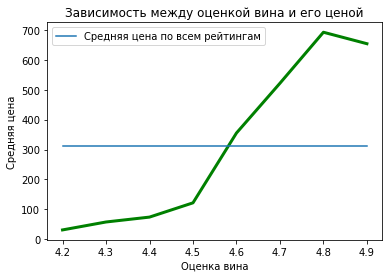

In [120]:
df_prices = df.groupby('rating')['price'].mean()
plt.plot(df_prices, color='green', linewidth=3)
plt.plot(df_prices_mean, label = 'Средняя цена по всем рейтингам')
plt.xlabel('Оценка вина')
plt.ylabel('Средняя цена')
plt.title('Зависимость между оценкой вина и его ценой');
plt.legend();


Исходя из данного графика можем сделать вывод, что при увеличении рейтинга вина (значит и его качества) средняя цена на вино имеет тенденцию к росту. 

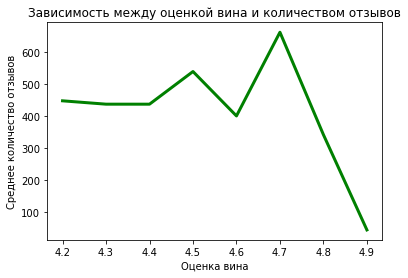

In [20]:
df_new = df.groupby('rating')['num_reviews'].mean()
plt.plot(df_new, color='green', linewidth=3)
plt.xlabel('Оценка вина')
plt.ylabel('Среднее количество отзывов')
plt.title('Зависимость между оценкой вина и количеством отзывов');


Для вина с оценкой от 4.2 до 4.7 наблюдается примерно постоянное (с небольшими отклонениями) количество отзывов, однако начиная с оценки 4.7 до 4.9 включительно (во всём датасете нет ни одного вина с оценкой 5) среднее количество отзывов начинает резко уменьшаться и стремится к нулю. Из вышеприведенных умозаключений можно сделать вывод, что более дорогое вино (соответственно более высокое по рейтингу) покупают реже, а значит и реже оставляют на него отзывы.

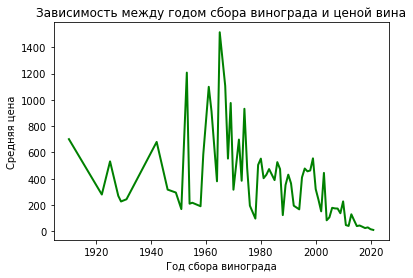

In [23]:
df_year = df.groupby('year')['price'].mean()
plt.plot(df_year, color='green', linewidth=2)
plt.xlabel('Год сбора винограда')
plt.ylabel('Средняя цена')
plt.title('Зависимость между годом сбора винограда и ценой вина');

Из данного графика тяжело сделать какие-либо существенные выводы. Однако можно сделать вывод, что в период (примерно) с 1945 по 1950 цены качество вина было достаточно высоко (следовательно, и цены достаточно высоки). То же самое можно сказать и с периодом с 1965 по (примерно) 1970 годы. Вероятно, это может быть связано с урожайностью винограда в данные периоды (данная информация будет проверена позже). Заметим, что с 1980 года средние цены на вино стали значительно падать и к 2020 году перестали превышать 200 евро. Важно отметить, что данная выборка учитывает исключительно испанские вина и, соответственно, конъюнктуру исключительно данного рынка красного вина. 

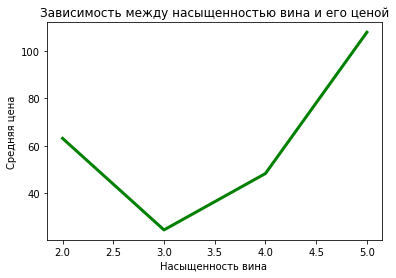

In [22]:
df_body = df.groupby('body')['price'].mean()
plt.plot(df_body, color='green', linewidth=3)
plt.xlabel('Насыщенность вина ')
plt.ylabel('Средняя цена')
plt.title('Зависимость между насыщенностью вина и его ценой');

Из данного графика можно сделать вывод, что насыщенность, которая равна трём, является наихудшей с точки зрения своей стоимости. Более высокая насыщенность способствует повышению цены вина.

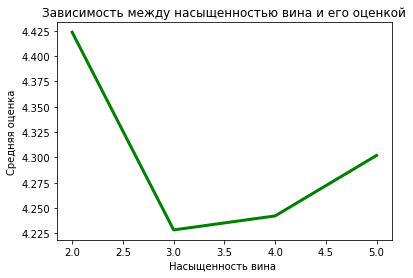

In [42]:
df_body = df.groupby('body')['rating'].mean()
plt.plot(df_body, color='green', linewidth=3)
plt.xlabel('Насыщенность вина ')
plt.ylabel('Средняя оценка')
plt.title('Зависимость между насыщенностью вина и его оценкой');

(Описание в работе)

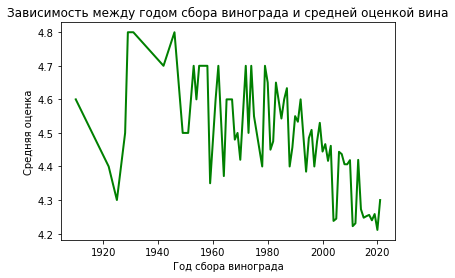

In [36]:
df_rate_year = df.groupby('year')['rating'].mean()
plt.plot(df_rate_year, color='green', linewidth=2)
plt.xlabel('Год сбора винограда')
plt.ylabel('Средняя оценка')
plt.title('Зависимость между годом сбора винограда и средней оценкой вина');

В целом можно сделать вывод, что с 1945 года (примерно) рейтинг вина начинает падать (в долгосрочной перспективе).

In [25]:
import plotly.express as px

fig = px.scatter(df, x = 'num_reviews', y = 'rating', trendline = 'ols', title = 'Взаимосвязь количества отзывов и рейтинга')
fig.show()

(График в доработке) 

# Далее всё находится на доработке. 

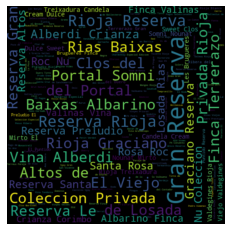

In [43]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud_hi = WordCloud(width=480, height=480, margin=0).generate(' '.join(df['wine']))
plt.imshow(wordcloud_hi, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show();

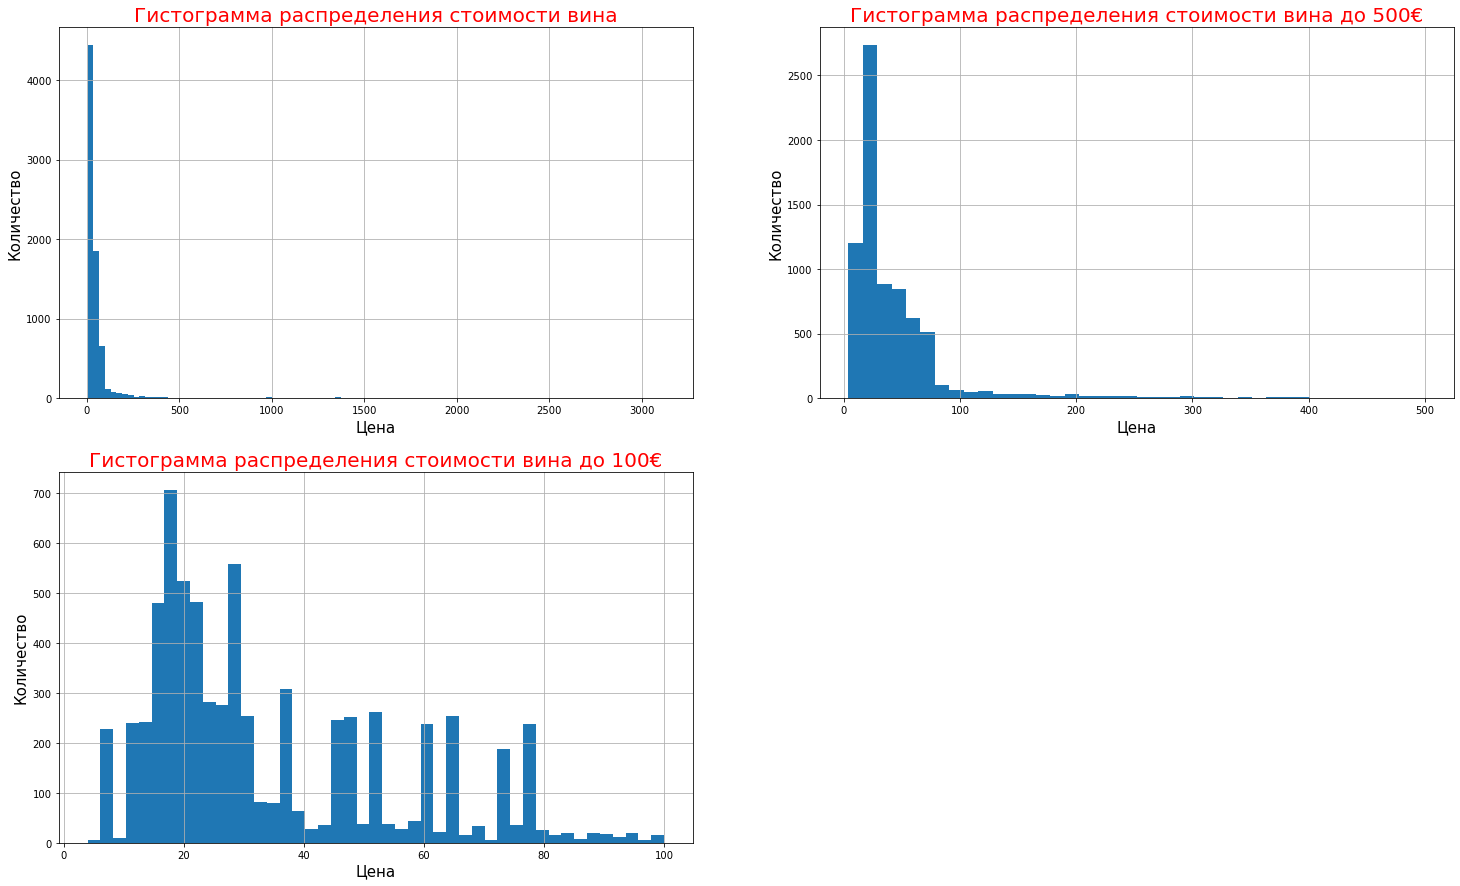

In [18]:
plt.figure(figsize = (25,15))


plt.subplot(2,2,1)

plt.title('Гистограмма распределения стоимости вина', fontsize = 20, color = 'red')
plt.xlabel("Цена", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df['price'], 100);

plt.subplot(2,2,2)

plt.title('Гистограмма распределения стоимости вина до 500€', fontsize = 20, color = 'red')
plt.xlabel("Цена", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df[df['price'] <= 500]['price'], 40);

plt.subplot(2,2,3)

plt.title('Гистограмма распределения стоимости вина до 100€', fontsize = 20, color = 'red')
plt.xlabel("Цена", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')
plt.grid()

plt.hist(df[df['price'] <= 100]['price'], 45);

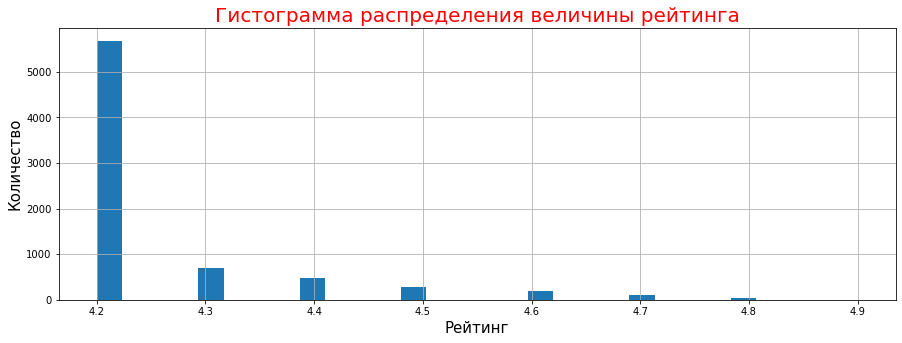

In [19]:
plt.figure(figsize = (15,5))


plt.title('Гистограмма распределения величины рейтинга', fontsize = 20, color = 'red')
plt.xlabel("Рейтинг", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df['rating'], 30);

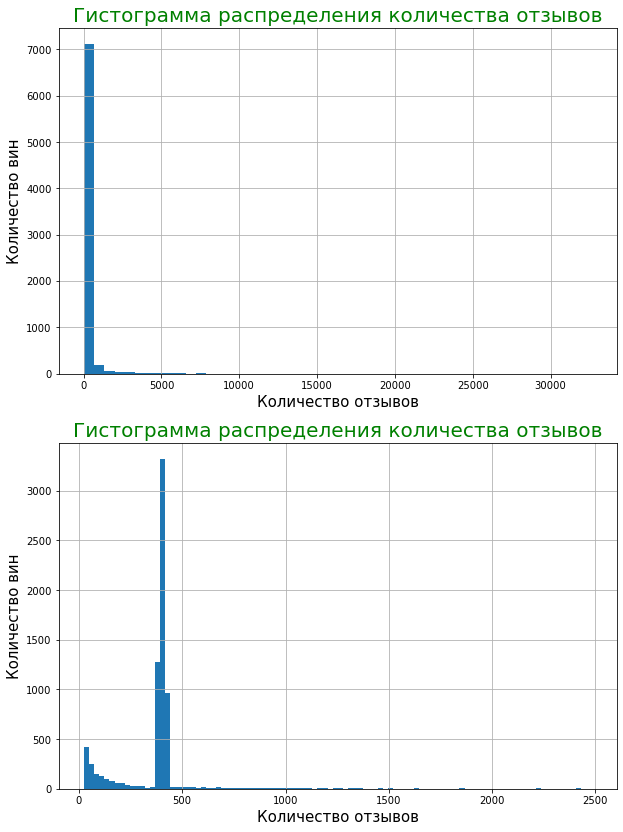

In [20]:
plt.figure(figsize = (10, 14))


plt.subplot(2,1,1)

plt.title('Гистограмма распределения количества отзывов', fontsize = 20, color = 'green')
plt.xlabel("Количество отзывов", fontsize = 15, color = 'black')
plt.ylabel("Количество вин", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df['num_reviews'], 50);

plt.subplot(2,1,2)

plt.title('Гистограмма распределения количества отзывов', fontsize = 20, color = 'green')
plt.xlabel("Количество отзывов", fontsize = 15, color = 'black')
plt.ylabel("Количество вин", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df[df['num_reviews'] <= 2500]['num_reviews'], 100);

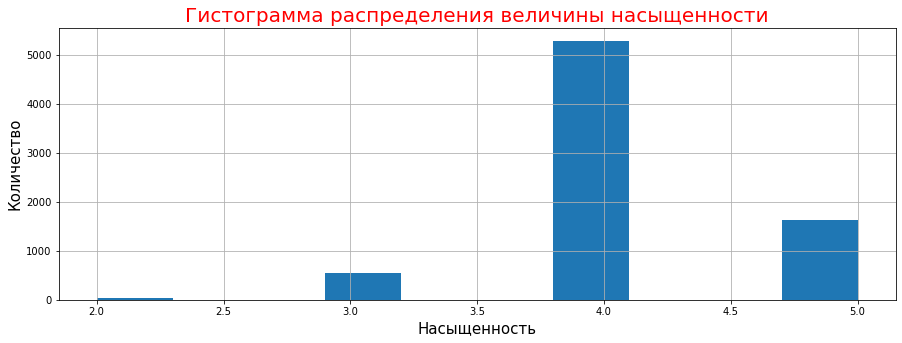

In [21]:
plt.figure(figsize = (15,5))


plt.title('Гистограмма распределения величины насыщенности', fontsize = 20, color = 'red')
plt.xlabel("Насыщенность", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df['body'], 10);

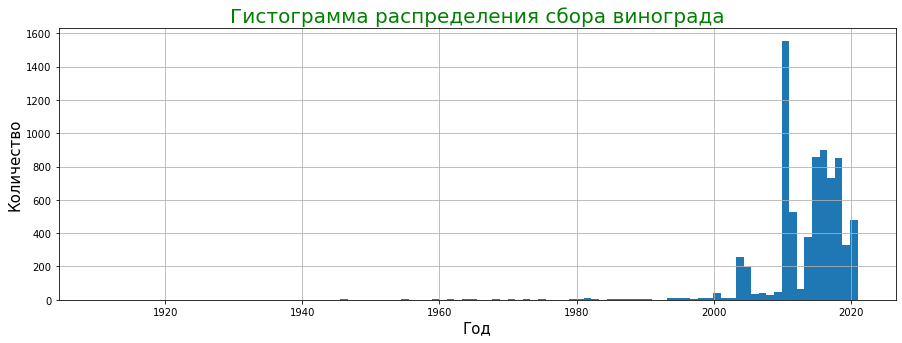

In [22]:
plt.figure(figsize = (15,5))


plt.title('Гистограмма распределения сбора винограда', fontsize = 20, color = 'green')
plt.xlabel("Год", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df['year'], 100);

In [40]:
df.corr()

year    rating  num_reviews     price      body   acidity
year         1.000000 -0.294618     0.022906 -0.383561 -0.110842  0.155449
rating      -0.294618  1.000000     0.015229  0.545039  0.166637 -0.098896
num_reviews  0.022906  0.015229     1.000000 -0.030039  0.059850  0.039208
price       -0.383561  0.545039    -0.030039  1.000000  0.161151 -0.039692
body        -0.110842  0.166637     0.059850  0.161151  1.000000 -0.026806
acidity      0.155449 -0.098896     0.039208 -0.039692 -0.026806  1.000000

<AxesSubplot:>

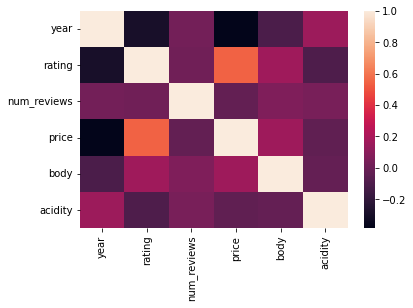

In [47]:
i_know = df.corr
i_know = i_know()
sns.heatmap(i_know)